# Step 1:

###  import library

import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Step 2:

### Process Data

In [14]:
def Data_Process():
    
    """
    This will read the CSV and Normalize the Data and
    Perform Train Test Split and Return
    X_Train, X_Test, Y_Train, Y_Test
    
    """
    # Name for the column  or Features Map
    columns_to_named = ["Pregnancies","Glucose","BloodPressure",
           "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
           "Age","Class"]
    
    # Read the Dataset and Rename the Column
    df = pd.read_csv("pima-indians-diabetes.csv",header=0,names=columns_to_named)

    col_norm =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age']
    
    # Normalization using Custom Lambda Function
    
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
    
    X_Data = df1_norm
    Y_Data = df["Class"]
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)
    
    return X_Train, X_Test, Y_Train, Y_Test

In [15]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()
X_Train.shape

(536, 8)

# Step 3:

### Create Model

In [56]:
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(10, init='uniform', activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activation='sigmoid' ))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


### Train

In [57]:
history = model.fit(X_Train.to_numpy(),
                    Y_Train.to_numpy(),
                    epochs=200, batch_size=30,
                    validation_data=(X_Test.to_numpy(), Y_Test.to_numpy()),
                    verbose=2)

Train on 536 samples, validate on 231 samples
Epoch 1/200
 - 1s - loss: 0.6919 - acc: 0.6437 - val_loss: 0.6902 - val_acc: 0.6494
Epoch 2/200
 - 0s - loss: 0.6888 - acc: 0.6530 - val_loss: 0.6873 - val_acc: 0.6494
Epoch 3/200
 - 0s - loss: 0.6855 - acc: 0.6530 - val_loss: 0.6833 - val_acc: 0.6494
Epoch 4/200
 - 0s - loss: 0.6806 - acc: 0.6530 - val_loss: 0.6788 - val_acc: 0.6494
Epoch 5/200
 - 0s - loss: 0.6753 - acc: 0.6530 - val_loss: 0.6727 - val_acc: 0.6494
Epoch 6/200
 - 0s - loss: 0.6684 - acc: 0.6530 - val_loss: 0.6672 - val_acc: 0.6494
Epoch 7/200
 - 0s - loss: 0.6629 - acc: 0.6530 - val_loss: 0.6613 - val_acc: 0.6494
Epoch 8/200
 - 0s - loss: 0.6569 - acc: 0.6530 - val_loss: 0.6572 - val_acc: 0.6494
Epoch 9/200
 - 0s - loss: 0.6534 - acc: 0.6530 - val_loss: 0.6538 - val_acc: 0.6494
Epoch 10/200
 - 0s - loss: 0.6497 - acc: 0.6530 - val_loss: 0.6513 - val_acc: 0.6494
Epoch 11/200
 - 0s - loss: 0.6477 - acc: 0.6530 - val_loss: 0.6483 - val_acc: 0.6494
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.4610 - acc: 0.7836 - val_loss: 0.5283 - val_acc: 0.7403
Epoch 98/200
 - 0s - loss: 0.4602 - acc: 0.7817 - val_loss: 0.5266 - val_acc: 0.7316
Epoch 99/200
 - 0s - loss: 0.4599 - acc: 0.7836 - val_loss: 0.5284 - val_acc: 0.7403
Epoch 100/200
 - 0s - loss: 0.4598 - acc: 0.7836 - val_loss: 0.5265 - val_acc: 0.7359
Epoch 101/200
 - 0s - loss: 0.4592 - acc: 0.7854 - val_loss: 0.5269 - val_acc: 0.7316
Epoch 102/200
 - 0s - loss: 0.4607 - acc: 0.7854 - val_loss: 0.5268 - val_acc: 0.7316
Epoch 103/200
 - 0s - loss: 0.4594 - acc: 0.7799 - val_loss: 0.5268 - val_acc: 0.7316
Epoch 104/200
 - 0s - loss: 0.4596 - acc: 0.7892 - val_loss: 0.5267 - val_acc: 0.7316
Epoch 105/200
 - 0s - loss: 0.4587 - acc: 0.7836 - val_loss: 0.5279 - val_acc: 0.7446
Epoch 106/200
 - 0s - loss: 0.4590 - acc: 0.7966 - val_loss: 0.5274 - val_acc: 0.7403
Epoch 107/200
 - 0s - loss: 0.4574 - acc: 0.7892 - val_loss: 0.5266 - val_acc: 0.7316
Epoch 108/200
 - 0s - loss: 0.4587 - acc: 0.7817 - val_lo

Epoch 193/200
 - 0s - loss: 0.4546 - acc: 0.7910 - val_loss: 0.5250 - val_acc: 0.7403
Epoch 194/200
 - 0s - loss: 0.4554 - acc: 0.7910 - val_loss: 0.5255 - val_acc: 0.7403
Epoch 195/200
 - 0s - loss: 0.4551 - acc: 0.7910 - val_loss: 0.5253 - val_acc: 0.7403
Epoch 196/200
 - 0s - loss: 0.4568 - acc: 0.7910 - val_loss: 0.5252 - val_acc: 0.7403
Epoch 197/200
 - 0s - loss: 0.4553 - acc: 0.7910 - val_loss: 0.5249 - val_acc: 0.7446
Epoch 198/200
 - 0s - loss: 0.4564 - acc: 0.7892 - val_loss: 0.5266 - val_acc: 0.7489
Epoch 199/200
 - 0s - loss: 0.4556 - acc: 0.7854 - val_loss: 0.5253 - val_acc: 0.7403
Epoch 200/200
 - 0s - loss: 0.4551 - acc: 0.7892 - val_loss: 0.5251 - val_acc: 0.7403


# Accuracy

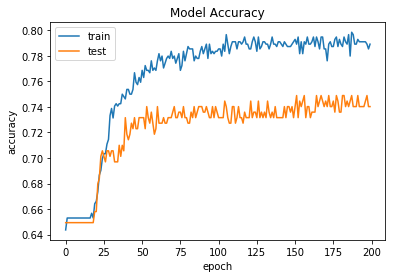

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Loss

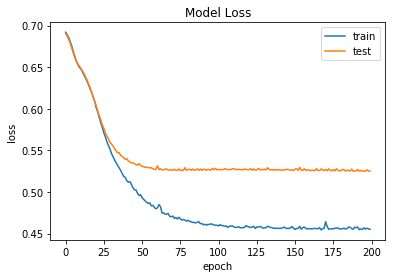

In [58]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [60]:
scores = model.evaluate(X_Test, Y_Test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 74.03%
